Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

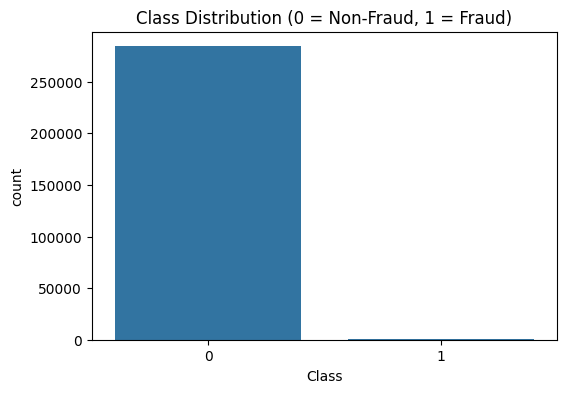


Descriptive Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e

In [24]:
#EXPLORATORY DATA ANALYSIS(EDA):
#-Checking Missing Values
#-Checking the Class distributions
#-Plotting CLass Distribution
#-CHecking the Summary Statistics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("C:\\Users\\Muralish\\Desktop\\Credit card fraud detection\\dataset\\creditcard.csv")

# Basic structure
print("Shape:", df.shape)
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Summary stats
print("\nDescriptive Statistics:\n", df.describe())




In [23]:
# DATA PREPROCESSING
#-Dropping the time column as it is not needed in the dataset
#-Split the Feature and Target
#-Normalizing the Amount column
#-Splitting the dataset into train and test
#-Applying SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Drop 'Time' if present
if 'Time' in df.columns:
    df = df.drop(['Time'], axis=1)

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE oversampling:")
print(y_resampled.value_counts())


Train set: (199364, 29) (199364,)
Test set: (85443, 29) (85443,)

After SMOTE oversampling:
Class
0    199020
1    199020
Name: count, dtype: int64


Lowest 5 variances:
 V28    0.108955
V27    0.162919
V26    0.232543
V25    0.271731
V24    0.366808
dtype: float64


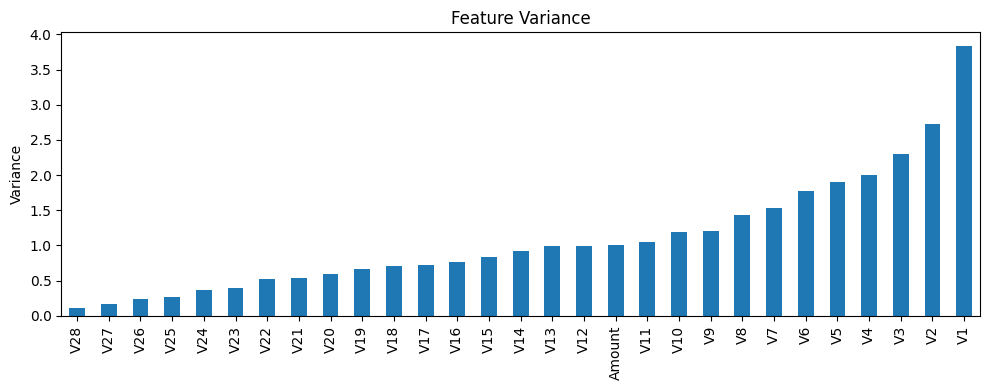

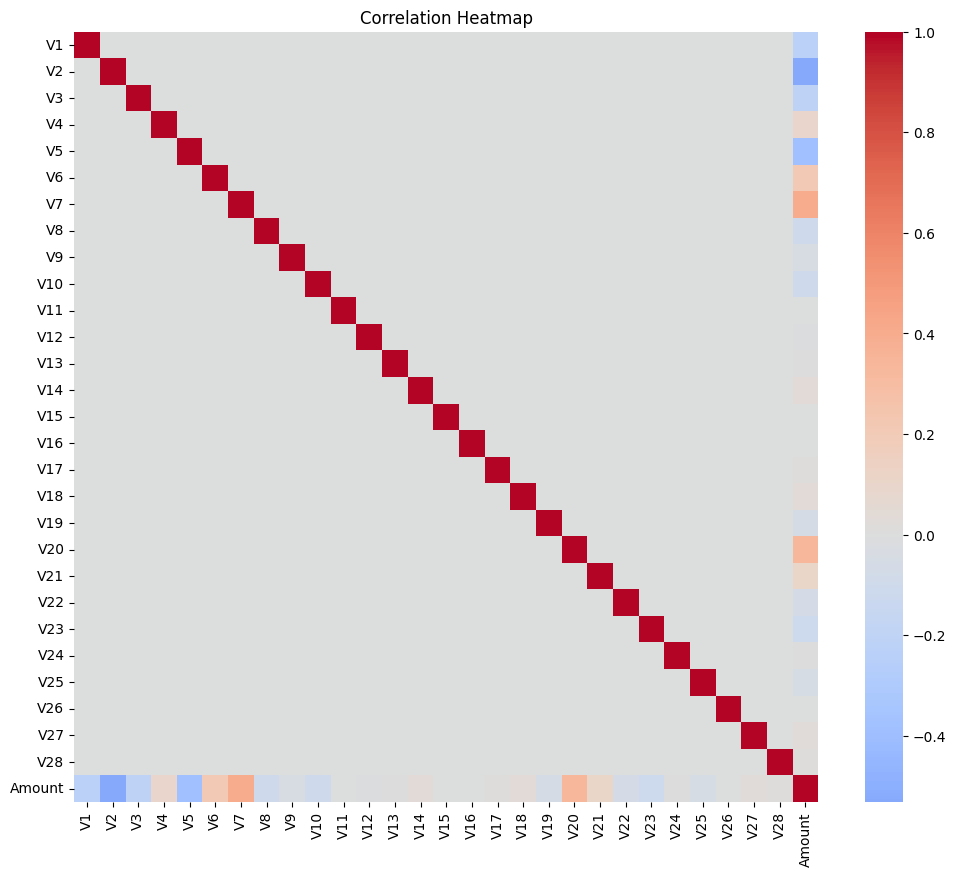


Highly correlated feature pairs (|corr| > 0.9):
Series([], dtype: float64)


In [8]:
#FEATURE ENGINEERING
#Checking the correlation for feature selection
#Generally, we consider dropping features with variance < 0.01 or 0.001, which indicates nearly constant values.
#Even the lowest variance feature (V28 = 0.1089) is not close to zero, so all features are Meaningful.


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Variance of features
feature_variance = X.var().sort_values(ascending=True)
print("Lowest 5 variances:\n", feature_variance.head())

# Plot feature variances
plt.figure(figsize=(10, 4))
feature_variance.plot(kind='bar')
plt.title("Feature Variance")
plt.ylabel("Variance")
plt.tight_layout()
plt.show()

# 2. Correlation matrix (heatmap)
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# 3. Check for highly correlated pairs
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

print("\nHighly correlated feature pairs (|corr| > 0.9):")
print(high_corr_pairs[high_corr_pairs.abs() > 0.9])


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Train logistic regression on SMOTE-resampled data
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_resampled, y_resampled)

#Prediction on training
y_train_pred_lr = log_reg.predict(X_resampled)

# Predict on test set
y_test_pred_lr = log_reg.predict(X_test)
y_test_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Accuracy scores
train_acc_lr = accuracy_score(y_resampled, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

# Evaluation

print(" Logistic Regression Accuracy")
print(f"Training Accuracy: {train_acc_lr:.4f}")
print(f"Testing Accuracy : {test_acc_lr:.4f}")
print()

print(" Logistic Regression Evaluation")
print("ROC AUC Score:", roc_auc_score(y_test, y_test_prob_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))


 Logistic Regression Accuracy
Training Accuracy: 0.9572
Testing Accuracy : 0.9768

 Logistic Regression Evaluation
ROC AUC Score: 0.9676177115036368
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9769    0.9882     85295
           1     0.0620    0.8784    0.1158       148

    accuracy                         0.9768     85443
   macro avg     0.5309    0.9277    0.5520     85443
weighted avg     0.9982    0.9768    0.9867     85443

Confusion Matrix:
 [[83328  1967]
 [   18   130]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Train Random Forest on SMOTE-resampled data
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_resampled, y_resampled)

# 2. Predictions
y_train_pred_rf = rf.predict(X_resampled)
y_test_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 3. Accuracy
train_acc = accuracy_score(y_resampled, y_train_pred_rf)
test_acc = accuracy_score(y_test, y_test_pred_rf)

print(" Random Forest Accuracy")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}\n")

# 4. Classification Report
report = classification_report(y_test, y_test_pred_rf, digits=4, output_dict=True)

print(" Classification Report (per class):")
for cls in ['0', '1']:
    print(f"\nClass {cls}:")
    print(f"  Precision: {report[cls]['precision']:.4f}")
    print(f"  Recall   : {report[cls]['recall']:.4f}")
    print(f"  F1-score : {report[cls]['f1-score']:.4f}")
    print(f"  Support  : {int(report[cls]['support'])}")

print("\n Full Classification Report:\n", classification_report(y_test, y_test_pred_rf, digits=4))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print("\n Confusion Matrix:")
print(f"  TN (True Negatives): {cm[0, 0]}")
print(f"  FP (False Positives): {cm[0, 1]}")
print(f"  FN (False Negatives): {cm[1, 0]}")
print(f"  TP (True Positives): {cm[1, 1]}")

# 6. ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"\n ROC AUC Score: {roc_auc:.4f}")


 Random Forest Accuracy
Training Accuracy: 1.0000
Testing Accuracy : 0.9994

 Classification Report (per class):

Class 0:
  Precision: 0.9996
  Recall   : 0.9998
  F1-score : 0.9997
  Support  : 85295

Class 1:
  Precision: 0.8657
  Recall   : 0.7838
  F1-score : 0.8227
  Support  : 148

 Full Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8657    0.7838    0.8227       148

    accuracy                         0.9994     85443
   macro avg     0.9326    0.8918    0.9112     85443
weighted avg     0.9994    0.9994    0.9994     85443


 Confusion Matrix:
  TN (True Negatives): 85277
  FP (False Positives): 18
  FN (False Negatives): 32
  TP (True Positives): 116

 ROC AUC Score: 0.9682


In [21]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest only on non-fraud cases from training set
X_iforest_train = X_train[y_train == 0]

iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)
iso_forest.fit(X_iforest_train)

# Score on test set
scores = -iso_forest.decision_function(X_test)
threshold = np.percentile(scores, 100 * (1 - y_test.mean()))  # Based on fraud ratio

# Predict: 1 = fraud if score >= threshold
y_pred_iso = (scores >= threshold).astype(int)

# Evaluation
print(" Isolation Forest Evaluation")
print("ROC AUC Score:", roc_auc_score(y_test, scores))
print("Classification Report:\n", classification_report(y_test, y_pred_iso, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso))


 Isolation Forest Evaluation
ROC AUC Score: 0.9426214742792502
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987     85295
           1     0.2297    0.2297    0.2297       148

    accuracy                         0.9973     85443
   macro avg     0.6142    0.6142    0.6142     85443
weighted avg     0.9973    0.9973    0.9973     85443

Confusion Matrix:
 [[85181   114]
 [  114    34]]
